In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Path to the CSV file in your Google Drive
drive_csv_path = '/content/drive/My Drive/fer2013.csv'

# Read CSV file into DataFrame
df = pd.read_csv(drive_csv_path)

# Display the first few rows of the DataFrame
print(df.head())


Mounted at /content/drive
   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import shutil
import cv2

# Load FER2013 dataset using pandas
# data = pd.read_csv('fer2013.csv')
data =df
# Define ratios for splitting
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Split dataset into training, validation, and test sets
train_data, test_data = train_test_split(data, test_size=test_ratio, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=val_ratio/(train_ratio + val_ratio), random_state=42)

# Define directories to save split datasets
train_dir = 'data/train'
val_dir = 'data/validation'
test_dir = 'data/test'

# Create directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Function to save images to directories
def save_images(data, directory):
    for index, row in data.iterrows():
        pixels = row['pixels'].split()
        image = [int(pixel) for pixel in pixels]
        image = pd.np.array(image, dtype='uint8').reshape((48, 48))  # Convert pixels to 2D array
        label = row['emotion']
        subdir = os.path.join(directory, str(label))
        os.makedirs(subdir, exist_ok=True)
        image_path = os.path.join(subdir, f'{index}.png')
        cv2.imwrite(image_path, image)  # Save image as PNG file

# Save images to directories
save_images(train_data, train_dir)
save_images(val_data, val_dir)
save_images(test_data, test_dir)

print("Splitting and saving complete.")


<ipython-input-3-83280588be2b>:34: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  image = pd.np.array(image, dtype='uint8').reshape((48, 48))  # Convert pixels to 2D array


Splitting and saving complete.


In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define constants
batch_size = 64
epochs = 10
learning_rate = 0.01  # Initial learning rate

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(40, 40, 3))

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(7, activation='softmax')(x)  # 7 classes for FER2013

# Create model
model = Model(inputs=base_model.input, outputs=output)

# Compile model
optimizer = SGD(learning_rate=learning_rate, momentum=0.9)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load data
train_generator = train_datagen.flow_from_directory(
    'train_dir',
    target_size=(40, 40),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    'val_dir',
    target_size=(40, 40),
    batch_size=batch_size,
    class_mode='categorical'
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator)
print('Test accuracy:', test_acc)


FileNotFoundError: [Errno 2] No such file or directory: 'train_dir'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import shutil
import cv2

# Load FER2013 dataset using pandas
# data = pd.read_csv('fer2013.csv')
data = df
# Define ratios for splitting
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Split dataset into training, validation, and test sets
train_data, test_data = train_test_split(data, test_size=test_ratio, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=val_ratio/(train_ratio + val_ratio), random_state=42)

# Define directories to save split datasets
train_dir = 'data/train'
val_dir = 'data/validation'
test_dir = 'data/test'

# Create directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Function to save images to directories
def save_images(data, directory):
    for index, row in data.iterrows():
        pixels = row['pixels'].split()
        image = [int(pixel) for pixel in pixels]
        image = pd.np.array(image, dtype='uint8').reshape((48, 48))  # Convert pixels to 2D array
        label = row['emotion']
        subdir = os.path.join(directory, str(label))
        os.makedirs(subdir, exist_ok=True)
        image_path = os.path.join(subdir, f'{index}.png')
        cv2.imwrite(image_path, image)  # Save image as PNG file

# Save images to directories
save_images(train_data, train_dir)
save_images(val_data, val_dir)
save_images(test_data, test_dir)

print("Splitting and saving complete.")

# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define constants
batch_size = 64
epochs = 10
learning_rate = 0.01  # Initial learning rate

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(40, 40, 3))

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(7, activation='softmax')(x)  # 7 classes for FER2013

# Create model
model = Model(inputs=base_model.input, outputs=output)

# Compile model
optimizer = SGD(learning_rate=learning_rate, momentum=0.9)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(40, 40),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(40, 40),
    batch_size=batch_size,
    class_mode='categorical'
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator)
print('Test accuracy:', test_acc)


<ipython-input-8-9c69ca71cd18>:34: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  image = pd.np.array(image, dtype='uint8').reshape((48, 48))  # Convert pixels to 2D array


Splitting and saving complete.
Found 25120 images belonging to 7 classes.
Found 5383 images belonging to 7 classes.
Epoch 1/10
392/392 [==============================] - 38s 92ms/step - loss: 1.7937 - accuracy: 0.2571 - val_loss: 1.7439 - val_accuracy: 0.2885
Epoch 2/10
392/392 [==============================] - 36s 92ms/step - loss: 1.7640 - accuracy: 0.2728 - val_loss: 1.7553 - val_accuracy: 0.2922
Epoch 3/10
392/392 [==============================] - 36s 92ms/step - loss: 1.7619 - accuracy: 0.2750 - val_loss: 1.7369 - val_accuracy: 0.2911
Epoch 4/10
392/392 [==============================] - 37s 94ms/step - loss: 1.7561 - accuracy: 0.2753 - val_loss: 1.7200 - val_accuracy: 0.3196
Epoch 5/10
392/392 [==============================] - 36s 91ms/step - loss: 1.7517 - accuracy: 0.2784 - val_loss: 1.7208 - val_accuracy: 0.3036
Epoch 6/10
392/392 [==============================] - 36s 91ms/step - loss: 1.7505 - accuracy: 0.2813 - val_loss: 1.7260 - val_accuracy: 0.2907
Epoch 7/10
392/392 [

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define constants
batch_size = 64
epochs = 300
learning_rate = 0.01  # Initial learning rate

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(40, 40, 3))

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(7, activation='softmax')(x)  # 7 classes for FER2013

# Create model
model = Model(inputs=base_model.input, outputs=output)

# Compile model
optimizer = SGD(learning_rate=learning_rate, momentum=0.9)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load data
train_generator = train_datagen.flow_from_directory(
    'train_data_directory',
    target_size=(40, 40),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    'validation_data_directory',
    target_size=(40, 40),
    batch_size=batch_size,
    class_mode='categorical'
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator)
print('Test accuracy:', test_acc)


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from google.colab import drive

# # Mount Google Drive
# drive.mount('/content/drive')

# # Path to the CSV file in your Google Drive
# drive_csv_path = '/content/drive/My Drive/fer2013.csv'

# Read CSV file into DataFrame
df = pd.read_csv(drive_csv_path)

# Display the first few rows of the DataFrame
print(df.head())

# Data preprocessing
# Convert string pixels to numpy arrays
pixels = df['pixels'].tolist()
images = np.array([np.fromstring(pixel, dtype=int, sep=' ') for pixel in pixels])
images = images / 255.0  # Normalize pixel values

# Convert emotions to categorical labels
emotions = to_categorical(df['emotion'])

# Reshape images into 48x48 grayscale images
images = images.reshape(images.shape[0], 48, 48, 1)

# Split the dataset into training, validation, and test sets
train_images, test_images, train_labels, test_labels = train_test_split(images, emotions, test_size=0.2, random_state=42)
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Define your CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')  # 7 output classes for 7 emotions
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_data=(val_images, val_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training
Epoch 1/20
359/359 [==============================] - 4s 8ms/step - loss: 1.6894 - accuracy: 0.3266 - val_loss: 1.5306 - val_accuracy: 0.4140
Epoch 2/20
359/359 [==============================] - 3s 7ms/step - loss: 1.4675 - accuracy: 0.4352 - val_loss: 1.4051 - val_accuracy: 0.4646
Epoch 3/20
359/359 [==============================] - 3s 8ms/step - loss: 1.3455 - accuracy: 0.4865 - val_loss: 1.3238 - val_accuracy: 0.4949
Epoch 4/20
359/359 [==============================] - 3s 8ms/step - loss: 1.2639 - accuracy: 0.5194 - val_loss: 1.2846 - val_accuracy: 0.5127


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from google.colab import drive
from tensorflow.keras.callbacks import EarlyStopping

# # Mount Google Drive
# drive.mount('/content/drive')

# # Path to the CSV file in your Google Drive
# drive_csv_path = '/content/drive/My Drive/fer2013.csv'

# # Read CSV file into DataFrame
# df = pd.read_csv(drive_csv_path)

# Data preprocessing
pixels = df['pixels'].tolist()
images = np.array([np.fromstring(pixel, dtype=int, sep=' ') for pixel in pixels])
images = images / 255.0  # Normalize pixel values
emotions = to_categorical(df['emotion'])
images = images.reshape(images.shape[0], 48, 48, 1)

# Split the dataset into training, validation, and test sets
train_images, test_images, train_labels, test_labels = train_test_split(images, emotions, test_size=0.2, random_state=42)
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Define your CNN model
def create_model(optimizer='adam', activation='relu'):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation=activation, input_shape=(48, 48, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation=activation),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation=activation),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=activation),
        tf.keras.layers.Dense(7, activation='softmax')  # 7 output classes for 7 emotions
    ])
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Define hyperparameters
optimizers = ['adam', 'rmsprop']
activations = ['relu', 'tanh', 'sigmoid']

best_accuracy = 0
best_model = None
best_hyperparameters = {}

# Perform grid search manually
for optimizer in optimizers:
    for activation in activations:
        model = create_model(optimizer=optimizer, activation=activation)
        early_stopping = EarlyStopping(monitor='val_loss', patience=3)
        history = model.fit(train_images, train_labels, epochs=100, batch_size=64,
                            validation_data=(val_images, val_labels), callbacks=[early_stopping])
        test_loss, test_acc = model.evaluate(test_images, test_labels)
        print(f'Test accuracy for optimizer={optimizer}, activation={activation}: {test_acc}')
        if test_acc > best_accuracy:
            best_accuracy = test_acc
            best_model = model
            best_hyperparameters = {'optimizer': optimizer, 'activation': activation}

# Print best hyperparameters and accuracy
print("Best hyperparameters:", best_hyperparameters)
print("Best test accuracy:", best_accuracy)


Epoch 1/100
359/359 [==============================] - 4s 8ms/step - loss: 1.6934 - accuracy: 0.3247 - val_loss: 1.5424 - val_accuracy: 0.4183
Epoch 2/100
359/359 [==============================] - 3s 8ms/step - loss: 1.4496 - accuracy: 0.4458 - val_loss: 1.3773 - val_accuracy: 0.4758
Epoch 3/100
359/359 [==============================] - 3s 7ms/step - loss: 1.3180 - accuracy: 0.4995 - val_loss: 1.2930 - val_accuracy: 0.4991
Epoch 4/100
359/359 [==============================] - 2s 7ms/step - loss: 1.2299 - accuracy: 0.5341 - val_loss: 1.2523 - val_accuracy: 0.5263
Epoch 5/100
359/359 [==============================] - 2s 7ms/step - loss: 1.1595 - accuracy: 0.5619 - val_loss: 1.2358 - val_accuracy: 0.5270
Epoch 6/100
359/359 [==============================] - 2s 7ms/step - loss: 1.0954 - accuracy: 0.5893 - val_loss: 1.2102 - val_accuracy: 0.5475
Epoch 7/100
359/359 [==============================] - 3s 8ms/step - loss: 1.0360 - accuracy: 0.6128 - val_loss: 1.2444 - val_accuracy: 0.5439

In [ ]:
# Define your CNN model with the best hyperparameters
best_model = create_model(optimizer='rmsprop', activation='relu')

# Apply dropout regularization to specific layers in the model
best_model.add(tf.keras.layers.Dropout(0.2))  # Example: Adding dropout to the first dense layer

# Define learning rate schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.9)

# Compile the model with learning rate scheduling
best_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=lr_schedule),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Train the model with early stopping and learning rate scheduling
history = best_model.fit(train_images, train_labels, epochs=100, batch_size=64,
                         validation_data=(val_images, val_labels),
                         callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

# Evaluate the model
test_loss, test_acc = best_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


Epoch 1/100
359/359 [==============================] - 8s 8ms/step - loss: nan - accuracy: 0.2759 - val_loss: 1.5544 - val_accuracy: 0.4075
Epoch 2/100
359/359 [==============================] - 3s 7ms/step - loss: 4.2669 - accuracy: 0.3718 - val_loss: 1.4178 - val_accuracy: 0.4558
Epoch 3/100
359/359 [==============================] - 3s 7ms/step - loss: 4.2140 - accuracy: 0.4142 - val_loss: 1.3533 - val_accuracy: 0.4761
Epoch 4/100
359/359 [==============================] - 3s 8ms/step - loss: nan - accuracy: 0.4429 - val_loss: 1.3108 - val_accuracy: 0.5033
Epoch 5/100
359/359 [==============================] - 3s 8ms/step - loss: 4.0966 - accuracy: 0.4709 - val_loss: 1.2256 - val_accuracy: 0.5338
Epoch 6/100
359/359 [==============================] - 3s 7ms/step - loss: 4.0189 - accuracy: 0.4902 - val_loss: 1.2280 - val_accuracy: 0.5254
Epoch 7/100
359/359 [==============================] - 3s 7ms/step - loss: 4.0060 - accuracy: 0.5047 - val_loss: 1.2103 - val_accuracy: 0.5472
Epoch

Epoch 1/100
359/359 [==============================] - 6s 16ms/step - loss: 3.7979 - accuracy: 0.5873 - val_loss: 1.3005 - val_accuracy: 0.5437
Epoch 2/100
359/359 [==============================] - 4s 10ms/step - loss: nan - accuracy: 0.6078 - val_loss: 1.2644 - val_accuracy: 0.5629
Epoch 3/100
359/359 [==============================] - 2s 7ms/step - loss: 3.6749 - accuracy: 0.6284 - val_loss: 1.3848 - val_accuracy: 0.5590
Epoch 4/100
359/359 [==============================] - 3s 8ms/step - loss: 3.6991 - accuracy: 0.6427 - val_loss: 1.4143 - val_accuracy: 0.5583
Epoch 5/100
359/359 [==============================] - 2s 7ms/step - loss: 3.5670 - accuracy: 0.6631 - val_loss: 1.4537 - val_accuracy: 0.5503


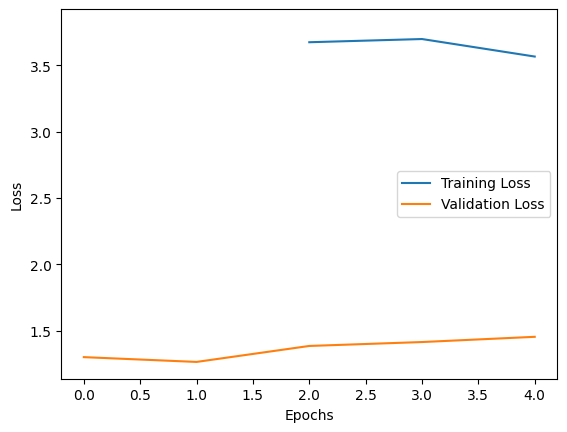

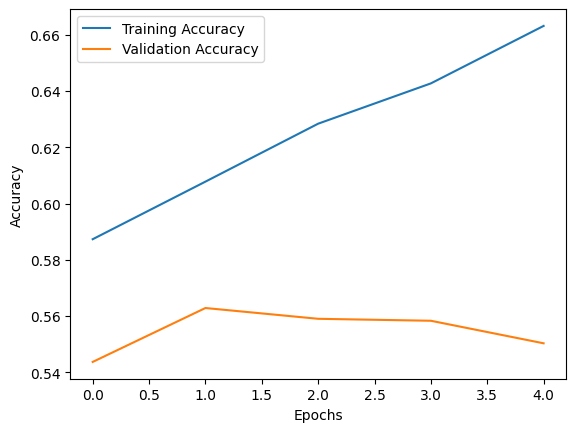

225/225 [==============================] - 1s 3ms/step - loss: 1.4418 - accuracy: 0.5469
Test accuracy: 0.546949028968811


In [ ]:
import matplotlib.pyplot as plt

# Train the model with early stopping and learning rate scheduling
history = best_model.fit(train_images, train_labels, epochs=100, batch_size=64,
                         validation_data=(val_images, val_labels),
                         callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_acc = best_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from google.colab import drive

# # Mount Google Drive
# drive.mount('/content/drive')

# # Path to the CSV file in your Google Drive
# drive_csv_path = '/content/drive/My Drive/fer2013.csv'

# # Read CSV file into DataFrame
# df = pd.read_csv(drive_csv_path)

# Data preprocessing
pixels = df['pixels'].tolist()
images = np.array([np.fromstring(pixel, dtype=int, sep=' ') for pixel in pixels])
images = images.reshape(-1, 48, 48, 1)
images = images.astype('float32') / 255.0  # Normalize pixel values
emotions = to_categorical(df['emotion'])

# Split the dataset into training, validation, and test sets
train_images, test_images, train_labels, test_labels = train_test_split(images, emotions, test_size=0.2, random_state=42)
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator()

# Create generators for training, validation, and test data
train_generator = train_datagen.flow(train_images, train_labels, batch_size=64)
val_generator = val_test_datagen.flow(val_images, val_labels, batch_size=64)
test_generator = val_test_datagen.flow(test_images, test_labels, batch_size=64)

# Define your CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

# # Compile the model
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # Train the model with early stopping
# history = model.fit(
#     train_generator,
#     steps_per_epoch=len(train_images) // 64,
#     epochs=100,
#     validation_data=val_generator,
#     validation_steps=len(val_images) // 64,
#     callbacks=[EarlyStopping(monitor='val_loss', patience=3)]
# )

# # Evaluate the model on test data
# test_loss, test_acc = model.evaluate(test_generator)
# print('Test accuracy:', test_acc)


# Define hyperparameters
optimizers = ['adam', 'rmsprop']
activations = ['relu', 'tanh', 'sigmoid']

best_accuracy = 0
best_model = None
best_hyperparameters = {}

# Perform grid search manually
for optimizer in optimizers:
    for activation in activations:
        model = create_model(optimizer=optimizer, activation=activation)
        early_stopping = EarlyStopping(monitor='val_loss', patience=3)
        history = model.fit(train_images, train_labels, epochs=100, batch_size=64,
                            validation_data=(val_images, val_labels), callbacks=[early_stopping])
        test_loss, test_acc = model.evaluate(test_images, test_labels)
        print(f'Test accuracy for optimizer={optimizer}, activation={activation}: {test_acc}')
        if test_acc > best_accuracy:
            best_accuracy = test_acc
            best_model = model
            best_hyperparameters = {'optimizer': optimizer, 'activation': activation}

# Print best hyperparameters and accuracy
print("Best hyperparameters:", best_hyperparameters)
print("Best test accuracy:", best_accuracy)


Epoch 1/100
359/359 [==============================] - 5s 9ms/step - loss: 1.6638 - accuracy: 0.3375 - val_loss: 1.5146 - val_accuracy: 0.4244
Epoch 2/100
359/359 [==============================] - 3s 9ms/step - loss: 1.4315 - accuracy: 0.4523 - val_loss: 1.3616 - val_accuracy: 0.4869
Epoch 3/100
359/359 [==============================] - 3s 8ms/step - loss: 1.2994 - accuracy: 0.5075 - val_loss: 1.2869 - val_accuracy: 0.5104
Epoch 4/100
359/359 [==============================] - 3s 7ms/step - loss: 1.2114 - accuracy: 0.5440 - val_loss: 1.2496 - val_accuracy: 0.5251
Epoch 5/100
359/359 [==============================] - 3s 7ms/step - loss: 1.1407 - accuracy: 0.5696 - val_loss: 1.2132 - val_accuracy: 0.5421
Epoch 6/100
359/359 [==============================] - 3s 7ms/step - loss: 1.0757 - accuracy: 0.5942 - val_loss: 1.1975 - val_accuracy: 0.5503
Epoch 7/100
359/359 [==============================] - 3s 8ms/step - loss: 1.0131 - accuracy: 0.6220 - val_loss: 1.1957 - val_accuracy: 0.5571

In [ ]:
# Define your CNN model with the best hyperparameters
best_model = create_model(optimizer='rmsprop', activation='relu')

# Apply dropout regularization to specific layers in the model
best_model.add(tf.keras.layers.Dropout(0.2))  # Example: Adding dropout to the first dense layer

# Define learning rate schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.9)

# Compile the model with learning rate scheduling
best_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=lr_schedule),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Train the model with early stopping and learning rate scheduling
history = best_model.fit(train_images, train_labels, epochs=100, batch_size=64,
                         validation_data=(val_images, val_labels),
                         callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

# Evaluate the model
test_loss, test_acc = best_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


Epoch 1/100
359/359 [==============================] - 7s 8ms/step - loss: 4.4633 - accuracy: 0.2636 - val_loss: 1.6033 - val_accuracy: 0.3690
Epoch 2/100
359/359 [==============================] - 3s 7ms/step - loss: 4.3375 - accuracy: 0.3627 - val_loss: 1.4411 - val_accuracy: 0.4472
Epoch 3/100
359/359 [==============================] - 3s 7ms/step - loss: 4.2017 - accuracy: 0.4075 - val_loss: 1.3886 - val_accuracy: 0.4619
Epoch 4/100
359/359 [==============================] - 3s 9ms/step - loss: 4.1277 - accuracy: 0.4368 - val_loss: 1.3282 - val_accuracy: 0.4894
Epoch 5/100
359/359 [==============================] - 3s 7ms/step - loss: 4.0507 - accuracy: 0.4637 - val_loss: 1.3112 - val_accuracy: 0.4852
Epoch 6/100
359/359 [==============================] - 3s 7ms/step - loss: 3.9944 - accuracy: 0.4835 - val_loss: 1.2484 - val_accuracy: 0.5293
Epoch 7/100
359/359 [==============================] - 3s 7ms/step - loss: 3.9839 - accuracy: 0.5049 - val_loss: 1.1938 - val_accuracy: 0.5526

In [ ]:
# Make predictions using the best model
test_predictions = best_model.predict(test_generator)
test_predicted_labels = np.argmax(test_predictions, axis=1)
test_true_labels = np.argmax(test_labels, axis=1)

# Compute the correlation matrix
correlation_matrix = np.corrcoef(test_predicted_labels, test_true_labels)

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


113/113 [==============================] - 1s 6ms/step
Correlation Matrix:
[[1.         0.00481576]
 [0.00481576 1.        ]]
